# Import Necessary modules

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances #We can calculate this matrix using 2 for loops, 
#but this isn't that important to calculate so we directly use this
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Here is the function for Hierarchical clustering

In [4]:
def OwnHeirarchical(data, cutoff, linkage):
    #This is done using dynamic programming approach
    # if 1, it is single linkage else 2 is complete linkage, 3 is average linkage
    distance_matrix = euclidean_distances(data, data) #Step 1 - Calculate distance matrix
    distance_matrix = np.tril(distance_matrix) #Step 2 - Since matrix is symmetric, we just keep lower triangle matrix
    distance_matrix[distance_matrix == 0] = np.inf #Step 3 - Replace 0 by inf, it makes it easy for us to extract minimum using min function
    df = pd.DataFrame(data=np.ones(data.shape[0])*np.inf) #Initialized a dataframe which will store which point is in which cluster
    if cutoff > distance_matrix.shape[0]: #If user provides impractical cut-off, cluster everthing into one cluster and not listen to user 
        cutoff = distance_matrix.shape[0]
    if linkage == 1: #This 1 means formula of single linkage will be used, it is explained ahead
        d = {} #This dictionary keeps record of which data points or cluster are merging, hence can be used to make a dendogram
        for i in range(0,cutoff):
            ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape) #from the distance matrix, get the minimum distance
            #np.unravel_index gives us the position of minimum distance. e.g. (0,4) is where minimum value is present in matrix.
            #This is what we need as in Hierarchical clustering, we merge the two pairs with minimum distance
            if i == 0:
                df.iloc[ij_min[0]] = 0
                df.iloc[ij_min[1]] = 0
            else:
                try:
                    a = int(df.iloc[ij_min[0]])
                except:
                    df.iloc[ij_min[0]] = i
                    a = i
                try:
                    b = int(df.iloc[ij_min[1]])
                except:
                    df.iloc[ij_min[1]] = i
                    b = i
                df[(df[0]==a) | (df[0]==b)] = i
            d[i] = ij_min
            #The if, else code till here is just filling the dataframe as the two points/clusters combine.
            #So, for example if 1 and 2 combines, dataframe will have 1 : 0, 2 : 0. Which means point 1 and 2 both are in same cluster (0th cluster)
            for j in range(0, ij_min[0]):
                #we want to ignore the diagonal, and diagonal is 0. We replaced 0 by infinte. 
                #So this if condition will skip diagonals
                if np.isfinite(distance_matrix[ij_min[0]][j]) and np.isfinite(distance_matrix[ij_min[1]][j]):
                    #after two points/cluster are linked, to calculate new distance we take minimum distance for single linkage
                    distance_matrix[ij_min[1]][j] = min(distance_matrix[ij_min[0]][j], distance_matrix[ij_min[1]][j])
            # To avoid the combined data points/cluster in further calculations, we make them infinte.
            #Our if loop above this, will therefore skip the infinite record entries.
            distance_matrix[ij_min[0]] = np.inf
        return d, df[0].as_matrix()
    elif linkage == 2:
        d_complete = {}
        for i in range(0,cutoff):
            ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)
            if i == 0:
                df.iloc[ij_min[0]] = 0
                df.iloc[ij_min[1]] = 0
            else:
                try:
                    a = int(df.iloc[ij_min[0]])
                except:
                    df.iloc[ij_min[0]] = i
                    a = i
                try:
                    b = int(df.iloc[ij_min[1]])
                except:
                    df.iloc[ij_min[1]] = i
                    b = i
                df[(df[0]==a) | (df[0]==b)] = i
            d_complete[i] = ij_min
            for j in range(0, ij_min[0]):
                if np.isfinite(distance_matrix[ij_min[0]][j]) and np.isfinite(distance_matrix[ij_min[1]][j]):
                    #after two points/cluster are linked, to calculate new distance we take maximum distance for complete linkage
                    distance_matrix[ij_min[1]][j] = max(distance_matrix[ij_min[0]][j], distance_matrix[ij_min[1]][j])
            distance_matrix[ij_min[0]] = np.inf
        return d_complete, df[0].as_matrix()
    elif linkage == 3:
        d_average = {}
        for i in range(0,cutoff):
            ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)
            if i == 0:
                df.iloc[ij_min[0]] = 0
                df.iloc[ij_min[1]] = 0
            else:
                try:
                    a = int(df.iloc[ij_min[0]])
                except:
                    df.iloc[ij_min[0]] = i
                    a = i
                try:
                    b = int(df.iloc[ij_min[1]])
                except:
                    df.iloc[ij_min[1]] = i
                    b = i
                df[(df[0]==a) | (df[0]==b)] = i
            d_average[i] = ij_min
            for j in range(0, ij_min[0]):
                if np.isfinite(distance_matrix[ij_min[0]][j]) and np.isfinite(distance_matrix[ij_min[1]][j]):
                    #after two points/cluster are linked, to calculate new distance we take average distance for average linkage
                    distance_matrix[ij_min[1]][j] = (distance_matrix[ij_min[0]][j] + distance_matrix[ij_min[1]][j])/2.0          
            distance_matrix[ij_min[0]] = np.inf
        return d_average, df[0].as_matrix()

## Test our function on Iris dataset

In [11]:
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data
d, target = OwnHeirarchical(iris_data, 147, 1) #147 iterations is cut-off which will give us 3 clusters, 1 is single linkage

In [12]:
d #this will show which data points combines when

{0: (34, 9),
 1: (37, 9),
 2: (39, 7),
 3: (132, 128),
 4: (17, 0),
 5: (48, 10),
 6: (28, 27),
 7: (4, 0),
 8: (27, 0),
 9: (40, 17),
 10: (49, 7),
 11: (81, 80),
 12: (91, 63),
 13: (92, 82),
 14: (96, 95),
 15: (7, 0),
 16: (12, 1),
 17: (21, 19),
 18: (38, 8),
 19: (46, 19),
 20: (47, 2),
 21: (30, 29),
 22: (45, 1),
 23: (93, 57),
 24: (99, 96),
 25: (137, 116),
 26: (75, 65),
 27: (138, 127),
 28: (80, 69),
 29: (9, 1),
 30: (29, 9),
 31: (95, 88),
 32: (126, 123),
 33: (139, 112),
 34: (26, 23),
 35: (42, 38),
 36: (89, 53),
 37: (25, 9),
 38: (84, 66),
 39: (97, 74),
 40: (143, 120),
 41: (11, 7),
 42: (23, 7),
 43: (43, 26),
 44: (147, 110),
 45: (73, 63),
 46: (127, 70),
 47: (82, 67),
 48: (3, 2),
 49: (19, 17),
 50: (58, 54),
 51: (65, 58),
 52: (116, 103),
 53: (145, 141),
 54: (146, 123),
 55: (78, 63),
 56: (148, 136),
 57: (144, 140),
 58: (6, 2),
 59: (87, 68),
 60: (94, 90),
 61: (122, 105),
 62: (130, 107),
 63: (52, 50),
 64: (56, 51),
 65: (113, 101),
 66: (140, 12

In [13]:
#as we can see, 34 and 9 combines first and so on. If 9 is combining again with 37, it means cluster 0 is combining with 1 and so on.

In [14]:
target

array([ 140.,  140.,  140.,  140.,  140.,  140.,  140.,  140.,  140.,
        140.,  140.,  140.,  140.,  140.,  140.,  140.,  140.,  140.,
        140.,  140.,  140.,  140.,  140.,  140.,  140.,  140.,  140.,
        140.,  140.,  140.,  140.,  140.,  140.,  140.,  140.,  140.,
        140.,  140.,  140.,  140.,  140.,  140.,  140.,  140.,  140.,
        140.,  140.,  140.,  140.,  140.,  146.,  146.,  146.,  144.,
        146.,  146.,  146.,  144.,  146.,  144.,  144.,  146.,  144.,
        146.,  144.,  146.,  146.,  144.,  144.,  144.,  146.,  146.,
        146.,  146.,  146.,  146.,  146.,  146.,  146.,  144.,  144.,
        144.,  144.,  146.,  146.,  146.,  146.,  144.,  146.,  144.,
        144.,  146.,  144.,  144.,  144.,  146.,  146.,  146.,  144.,
        146.,  146.,  146.,  146.,  146.,  146.,  146.,  146.,  146.,
        146.,  146.,  146.,  146.,  146.,  146.,  146.,  146.,  146.,
        146.,  146.,  146.,  146.,  146.,  146.,  146.,  146.,  146.,
        146.,  146.,

In [15]:
#Let's convert it to iris.target format
target[target == 140] = 0
target[target == 144] = 1
target[target == 146] = 2

In [16]:
target

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,
        2.,  1.,  2.,  2.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,  1.,
        2.,  2.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  1.,  2.,  1.,  1.,
        2.,  1.,  1.,  1.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.])

In [17]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Let's visualize the data

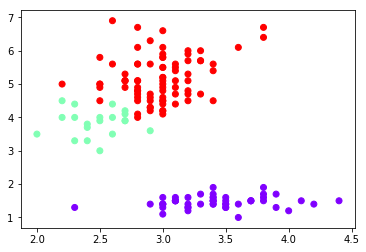

In [19]:
plt.scatter(iris_data[:,1], iris_data[:,2], c=target, cmap="rainbow")

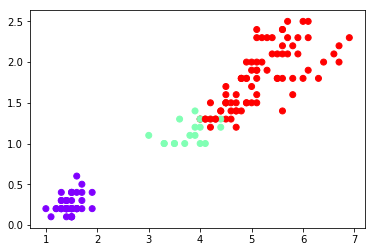

In [20]:
plt.scatter(iris_data[:,2], iris_data[:,3], c=target, cmap="rainbow")

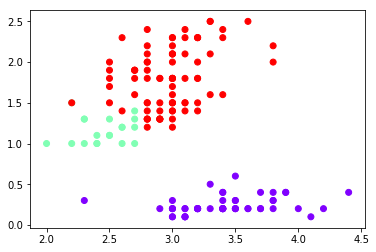

In [21]:
plt.scatter(iris_data[:,1], iris_data[:,3], c=target, cmap="rainbow")

In [22]:
#Notice the performance of Hierarchical is not that great compared to KMeans. It worked great on convoluted data sets

In [23]:
#Also, we don't need to specify number of cluster in this.

## Let's use complete linkage and average linkage and check the performance

In [24]:
d_complete, target_complete = OwnHeirarchical(iris_data, 147, 2) #2 for complete linkage

In [25]:
d_complete

{0: (34, 9),
 1: (37, 9),
 2: (39, 7),
 3: (132, 128),
 4: (17, 0),
 5: (48, 10),
 6: (28, 27),
 7: (4, 0),
 8: (40, 17),
 9: (49, 7),
 10: (81, 80),
 11: (91, 63),
 12: (92, 82),
 13: (96, 95),
 14: (12, 1),
 15: (21, 19),
 16: (27, 0),
 17: (38, 8),
 18: (46, 19),
 19: (47, 2),
 20: (30, 29),
 21: (45, 1),
 22: (93, 57),
 23: (99, 96),
 24: (137, 116),
 25: (75, 65),
 26: (138, 127),
 27: (9, 1),
 28: (95, 88),
 29: (126, 123),
 30: (139, 112),
 31: (26, 23),
 32: (42, 38),
 33: (89, 53),
 34: (25, 9),
 35: (84, 66),
 36: (97, 74),
 37: (143, 120),
 38: (11, 7),
 39: (43, 26),
 40: (147, 110),
 41: (29, 3),
 42: (73, 63),
 43: (58, 54),
 44: (116, 103),
 45: (145, 141),
 46: (146, 123),
 47: (78, 63),
 48: (148, 136),
 49: (144, 140),
 50: (6, 2),
 51: (87, 68),
 52: (94, 90),
 53: (122, 105),
 54: (130, 107),
 55: (80, 69),
 56: (52, 50),
 57: (56, 51),
 58: (113, 101),
 59: (142, 113),
 60: (31, 20),
 61: (82, 67),
 62: (86, 52),
 63: (127, 126),
 64: (149, 127),
 65: (36, 10),
 66

In [26]:
target_complete

array([ 141.,  141.,  141.,  141.,  141.,  141.,  141.,  141.,  141.,
        141.,  141.,  141.,  141.,  141.,  141.,  141.,  141.,  141.,
        141.,  141.,  141.,  141.,  141.,  141.,  141.,  141.,  141.,
        141.,  141.,  141.,  141.,  141.,  141.,  141.,  141.,  141.,
        141.,  141.,  141.,  141.,  141.,  141.,  141.,  141.,  141.,
        141.,  141.,  141.,  141.,  141.,  146.,  146.,  146.,  143.,
        146.,  143.,  146.,  143.,  146.,  143.,  143.,  143.,  143.,
        143.,  143.,  146.,  143.,  143.,  146.,  143.,  146.,  143.,
        143.,  143.,  143.,  146.,  146.,  146.,  143.,  143.,  143.,
        143.,  143.,  143.,  143.,  146.,  146.,  146.,  143.,  143.,
        143.,  143.,  143.,  143.,  143.,  143.,  143.,  143.,  143.,
        143.,  146.,  146.,  146.,  146.,  146.,  146.,  143.,  146.,
        146.,  146.,  146.,  146.,  146.,  146.,  146.,  146.,  146.,
        146.,  146.,  143.,  146.,  146.,  146.,  143.,  146.,  146.,
        143.,  143.,

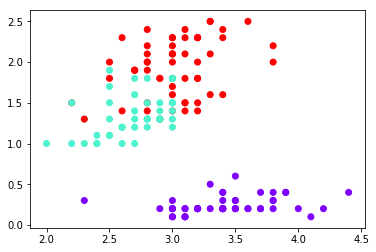

In [31]:
plt.scatter(iris_data[:,1], iris_data[:,3], c=target_complete, cmap="rainbow")

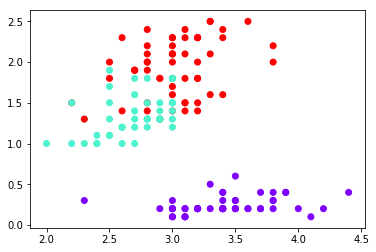

In [34]:
plt.scatter(iris_data[:,1], iris_data[:,3], c=target_complete, cmap="rainbow")

In [35]:
#This is because we are plotting it in 2-dimension but the data is in 4-dimensions.

In [36]:
#Let's use average linkage now

In [37]:
d_average, target_average = OwnHeirarchical(iris_data, 147, 3) #3 is for average linkage

In [38]:
d_average

{0: (34, 9),
 1: (37, 9),
 2: (39, 7),
 3: (132, 128),
 4: (17, 0),
 5: (48, 10),
 6: (28, 27),
 7: (4, 0),
 8: (40, 17),
 9: (49, 7),
 10: (81, 80),
 11: (91, 63),
 12: (92, 82),
 13: (96, 95),
 14: (27, 0),
 15: (12, 1),
 16: (21, 19),
 17: (38, 8),
 18: (46, 19),
 19: (47, 2),
 20: (30, 29),
 21: (45, 1),
 22: (93, 57),
 23: (99, 96),
 24: (137, 116),
 25: (75, 65),
 26: (138, 127),
 27: (9, 1),
 28: (95, 88),
 29: (126, 123),
 30: (139, 112),
 31: (7, 0),
 32: (29, 3),
 33: (26, 23),
 34: (42, 38),
 35: (89, 53),
 36: (25, 9),
 37: (84, 66),
 38: (97, 74),
 39: (80, 69),
 40: (143, 120),
 41: (11, 7),
 42: (43, 26),
 43: (147, 110),
 44: (73, 63),
 45: (58, 54),
 46: (116, 103),
 47: (145, 141),
 48: (146, 123),
 49: (78, 63),
 50: (148, 136),
 51: (144, 140),
 52: (127, 70),
 53: (82, 67),
 54: (6, 2),
 55: (87, 68),
 56: (94, 90),
 57: (122, 105),
 58: (130, 107),
 59: (52, 50),
 60: (56, 51),
 61: (113, 101),
 62: (142, 113),
 63: (3, 2),
 64: (65, 58),
 65: (19, 4),
 66: (140, 

In [39]:
target_average

array([ 135.,  135.,  135.,  135.,  135.,  135.,  135.,  135.,  135.,
        135.,  135.,  135.,  135.,  135.,  135.,  135.,  135.,  135.,
        135.,  135.,  135.,  135.,  135.,  135.,  135.,  135.,  135.,
        135.,  135.,  135.,  135.,  135.,  135.,  135.,  135.,  135.,
        135.,  135.,  135.,  135.,  135.,  135.,  135.,  135.,  135.,
        135.,  135.,  135.,  135.,  135.,  146.,  146.,  146.,  143.,
        146.,  146.,  146.,  143.,  146.,  143.,  143.,  146.,  143.,
        146.,  143.,  146.,  146.,  143.,  146.,  143.,  146.,  146.,
        146.,  146.,  146.,  146.,  146.,  146.,  146.,  143.,  143.,
        143.,  143.,  146.,  146.,  146.,  146.,  146.,  146.,  143.,
        146.,  146.,  143.,  143.,  146.,  146.,  146.,  146.,  143.,
        146.,  146.,  146.,  146.,  146.,  146.,  146.,  146.,  146.,
        146.,  146.,  146.,  146.,  146.,  146.,  146.,  146.,  146.,
        146.,  146.,  146.,  146.,  146.,  146.,  146.,  146.,  146.,
        146.,  146.,

In [40]:
target_average[target_average == 135] = 0
target_average[target_average == 143] = 1
target_average[target_average == 146] = 2

In [41]:
target_average

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,
        2.,  1.,  2.,  2.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,  1.,
        2.,  2.,  1.,  2.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,
        2.,  1.,  1.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.])

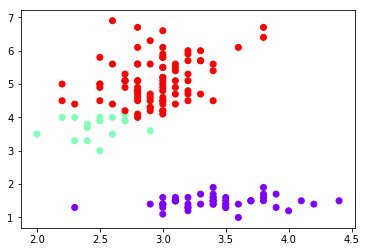

In [43]:
plt.scatter(iris_data[:,1], iris_data[:,2], c=target_average, cmap="rainbow")

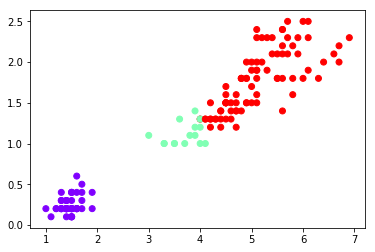

In [44]:
plt.scatter(iris_data[:,2], iris_data[:,3], c=target_average, cmap="rainbow")

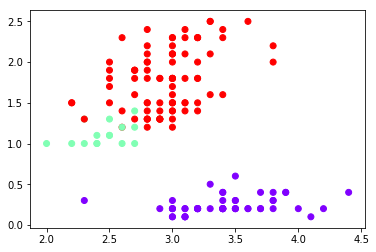

In [45]:
plt.scatter(iris_data[:,1], iris_data[:,3], c=target_average, cmap="rainbow")

In [47]:
100 - (iris.target != target_average).sum()/float(iris.target.size)*100

77.333333333333343

In [48]:
#So, 77% accuracy. This is lot less than using KMeans on this. Refer my KMeans repo for my KMeans code and example.

In [49]:
100 - (iris.target != target).sum()/float(iris.target.size)*100

80.0

In [50]:
#Single linkage gave us 80% accuracy compared to average linkage

In [51]:
target_complete[target_complete == 141] = 0
target_complete[target_complete == 143] = 1
target_complete[target_complete == 146] = 2

In [52]:
100 - (iris.target != target_complete).sum()/float(iris.target.size)*100

84.0

In [53]:
#complete linkage gave us 84% accuracy. So, for our iris data set, accuracy was high using complete linkage but not as high as KMeans.